# Probability Density Function

In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
class ProbabilityDistribution:
    def __init__(self,minX,maxX,stepSize):
        self.minX=minX
        self.maxX=maxX
        self.stepSize=stepSize
        self.domain=np.arange(minX,maxX,stepSize)
        self._name="Probability Distribution"
    def getDist(self):
        pass
    def getExpectation(self):
        return np.sum(np.multiply(self.domain,self.getDist()))*self.stepSize
    def getVariance(self):
        M=self.getExpectation()
        return np.sum(np.multiply(np.power(self.domain-M,2),self.getDist()))*self.stepSize
    def getMode(self):
        """Mode (statistics) The mode of a set of data values is the value that appears most often. 
        It is the value x at which its probability mass function takes its maximum value. 
        In other words, it is the value that is most likely to be sampled.          """
        return self.domain[self.getDist().argmax()]
    def getReport(self):
        report="""Probability Distribution: {}\n
        -------------------\n
        Expectation: {}\n
        Variance   : {}\n
        Mode       : {}\n
        -------------------\n
        """.format(self._name,self.getExpectation(),self.getVariance(),self.getMode())
        return report
    def plot(self):
        plt.plot(self.domain,self.getDist())

In [3]:
from scipy.special import gamma
class Gamma(ProbabilityDistribution):
    def __init__(self,minX,maxX,stepSize,a,b):
        ProbabilityDistribution.__init__(self,minX,maxX,stepSize)
        self.a=a
        self.b=b
        self._name="Gamma"
    def getDist(self):
        return np.power(self.b,self.a)*np.multiply(np.power(self.domain,self.a-1),
                                                   np.exp(-self.b*self.domain))/gamma(self.a)

## Univariate normal distribution

-  a univariate distribution is a probability distribution of only one random variable. This is in contrast to a multivariate distribution, the probability distribution of a random vector (consisting of multiple random variables).

-  the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4abaca87a10ecfa77b5a205056523706fe6c9c3f"/>

In [4]:
class Normal(ProbabilityDistribution):
    def __init__(self,minX,maxX,stepSize,M,S):
        ProbabilityDistribution.__init__(self,minX,maxX,stepSize)
        self.M=M
        self.S=S
        self._name="Normal/Gaussian"
    def getDist(self):
        return (1/np.sqrt(2*np.pi*self.S**2))*np.exp(-np.power((self.domain-self.M),2)/(2*self.S**2))
        

In [5]:
class GMixtureM(ProbabilityDistribution):
    def __init__(self,minX,maxX,stepSize):
        ProbabilityDistribution.__init__(self,minX,maxX,stepSize)
        self.gausians=[]
        self.weights=[]
        self._name="GMM"
    def addGausian(self,M,S,weight):
        self.gausians.append(Normal(self.minX,self.maxX,self.stepSize,M,S))
        self.weights.append(weight)
    def getDist(self):
        cumDist=np.arange(self.minX,self.maxX,self.stepSize)*0
        for i,dist in enumerate(self.gausians):
            cumDist+=self.weights[i]*dist.getDist()
        return cumDist
    def getReport(self):
        report=ProbabilityDistribution.getReport(self)+"\n\n"
        for i,dist in enumerate(self.gausians):
            report+="Model {}\n{}\n".format(i,dist.getReport())
        return report
    def plot(self):
        cumDist=self.getDist()
        legend=[]
        for i,dist in enumerate(self.gausians):
            dist.plot()
            legend.append("model {}".format(i))
        legend.append("GMM")
        plt.plot(self.domain,cumDist)
        plt.grid()
        plt.legend(legend)

In [6]:
class Beta(ProbabilityDistribution):
    def __init__(self,stepSize,a,b):
        ProbabilityDistribution.__init__(self,stepSize,1,stepSize)
        self.a=a
        self.b=b
        self._name="Beta"
    def getExpectation(self):
        return self.a/(self.a+self.b+0.0)
    def getVariance(self):
        return (self.a*self.b)/(np.power(self.a+self.b,2)*(self.a+self.b-1))
    def __beta(self,a,b):
        return gamma(a+b)/(gamma(a)*gamma(b)*1.0)
    def getDist(self):
        pdf=np.multiply(np.power(self.domain,self.a-1)
                           ,np.power(1-self.domain,self.b-1))/self.__beta(self.a,self.b)
        return pdf/pdf.sum()

In [7]:
print(Beta(0.01,2,3).getReport())

Probability Distribution: Beta

        -------------------

        Expectation: 0.4

        Variance   : 0.06

        Mode       : 0.33

        -------------------

        


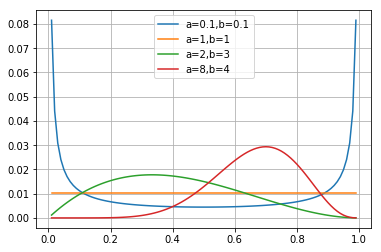

In [8]:
plt.figure()
Beta(0.01,0.1,0.1).plot()
Beta(0.01,1,1).plot()
Beta(0.01,2,3).plot()
Beta(0.01,8,4).plot()
plt.grid()
plt.legend(["a=0.1,b=0.1","a=1,b=1","a=2,b=3","a=8,b=4"])

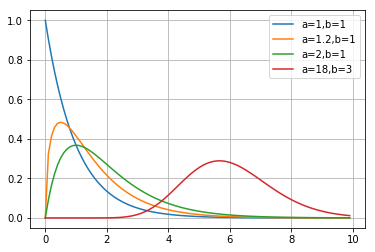

In [9]:
plt.figure()
Gamma(0,10,0.1,a=1,b=1).plot()
Gamma(0,10,0.1,a=1.5,b=1).plot()
Gamma(0,10,0.1,a=2,b=1).plot()
Gamma(0,10,0.1,a=18,b=3).plot()
plt.grid()
plt.legend(["a=1,b=1","a=1.2,b=1","a=2,b=1","a=18,b=3"])

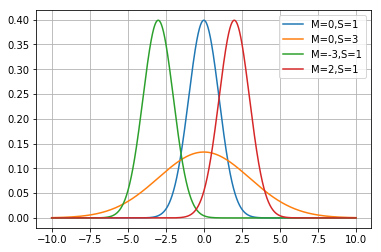

In [10]:
plt.figure()
Normal(-10,10,0.001,M=0,S=1).plot()
Normal(-10,10,0.001,M=0,S=3).plot()
Normal(-10,10,0.001,M=-3,S=1).plot()
Normal(-10,10,0.001,M=2,S=1).plot()
plt.grid()
plt.legend(["M=0,S=1","M=0,S=3","M=-3,S=1","M=2,S=1"])

Probability Distribution: GMM

        -------------------

        Expectation: -1.9996655744398157

        Variance   : 11.394312500409384

        Mode       : 1.7979999999906902

        -------------------

        

Model 0
Probability Distribution: Normal/Gaussian

        -------------------

        Expectation: -2.999581968050045

        Variance   : 8.993531710462456

        Mode       : -3.0000000000066507

        -------------------

        
Model 1
Probability Distribution: Normal/Gaussian

        -------------------

        Expectation: 2.0000000000011022

        Variance   : 1.0000000000005131

        Mode       : 1.9999999999905782

        -------------------

        



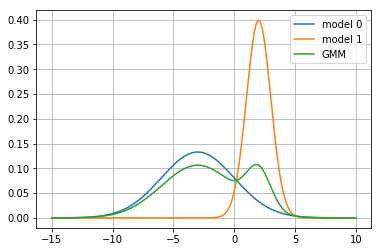

In [11]:
model=GMixtureM(-15,10,0.001)
model.addGausian(M=-3,S=3,weight=0.8)
model.addGausian(M=2,S=1,weight=0.2)
print(model.getReport())
model.plot()

# Gamma

<img src="http://www.statisticshowto.com/wp-content/uploads/2015/07/skewed-left.png"/>